In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 188. Feature Extraction from Text - Coding Count Vectorization Manually

In [2]:
with open(r'F:\DataSpell\data_science_ml_learning\DATA\One.txt') as mytext:
    a = mytext.readlines()

In [3]:
print(a)

['This is a story about dogs\n', 'our canine pets\n', 'Dogs are furry animals\n']


In [4]:
words = [word for line in a for word in line.lower().split()]

In [5]:
words

['this',
 'is',
 'a',
 'story',
 'about',
 'dogs',
 'our',
 'canine',
 'pets',
 'dogs',
 'are',
 'furry',
 'animals']

In [6]:
with open(r'F:\DataSpell\data_science_ml_learning\DATA\One.txt') as mytext:
    a = mytext.read().lower().split()
    unique_words_one = set(a)

In [7]:
unique_words_one

{'a',
 'about',
 'animals',
 'are',
 'canine',
 'dogs',
 'furry',
 'is',
 'our',
 'pets',
 'story',
 'this'}

In [8]:
with open(r'F:\DataSpell\data_science_ml_learning\DATA\Two.txt') as mytext:
    word_two = mytext.read().lower().split()
    uni_words_two = set(word_two)

In [9]:
uni_words_two

{'a',
 'about',
 'catching',
 'fun',
 'is',
 'popular',
 'sport',
 'story',
 'surfing',
 'this',
 'water',
 'waves'}

In [10]:
all_unique_words = set()
all_unique_words.update(unique_words_one)
all_unique_words.update(uni_words_two)

In [11]:
all_unique_words

{'a',
 'about',
 'animals',
 'are',
 'canine',
 'catching',
 'dogs',
 'fun',
 'furry',
 'is',
 'our',
 'pets',
 'popular',
 'sport',
 'story',
 'surfing',
 'this',
 'water',
 'waves'}

In [12]:
full_vocab = dict()
i = 0

for word in all_unique_words:
    full_vocab[word] = i
    i += 1

In [13]:
{word: i for i, word in enumerate(all_unique_words)}

{'canine': 0,
 'pets': 1,
 'fun': 2,
 'surfing': 3,
 'is': 4,
 'our': 5,
 'popular': 6,
 'animals': 7,
 'furry': 8,
 'this': 9,
 'about': 10,
 'sport': 11,
 'waves': 12,
 'are': 13,
 'water': 14,
 'catching': 15,
 'a': 16,
 'dogs': 17,
 'story': 18}

In [14]:
full_vocab

{'canine': 0,
 'pets': 1,
 'fun': 2,
 'surfing': 3,
 'is': 4,
 'our': 5,
 'popular': 6,
 'animals': 7,
 'furry': 8,
 'this': 9,
 'about': 10,
 'sport': 11,
 'waves': 12,
 'are': 13,
 'water': 14,
 'catching': 15,
 'a': 16,
 'dogs': 17,
 'story': 18}

In [15]:
one_freq = [0] * len(full_vocab)
two_freq = [0] * len(full_vocab)
all_words = [''] * len(full_vocab)

In [16]:
full_vocab

{'canine': 0,
 'pets': 1,
 'fun': 2,
 'surfing': 3,
 'is': 4,
 'our': 5,
 'popular': 6,
 'animals': 7,
 'furry': 8,
 'this': 9,
 'about': 10,
 'sport': 11,
 'waves': 12,
 'are': 13,
 'water': 14,
 'catching': 15,
 'a': 16,
 'dogs': 17,
 'story': 18}

In [17]:
with open(r'F:\DataSpell\data_science_ml_learning\DATA\One.txt') as one_text:
    one_text = one_text.read().lower().split()

In [18]:
for word in one_text:
    word_ind = full_vocab[word]
    one_freq[word_ind] += 1

In [19]:
one_freq

[1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 2, 1]

In [20]:
with open(r'F:\DataSpell\data_science_ml_learning\DATA\Two.txt') as two_text:
    two_text = two_text.read().lower().split()

In [21]:
for word in two_text:
    word_ind = full_vocab[word]
    two_freq[word_ind] += 1

In [22]:
all_words

['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

In [23]:
for word in full_vocab:
    word_ind = full_vocab[word]
    all_words[word_ind] = word

In [24]:
all_words

['canine',
 'pets',
 'fun',
 'surfing',
 'is',
 'our',
 'popular',
 'animals',
 'furry',
 'this',
 'about',
 'sport',
 'waves',
 'are',
 'water',
 'catching',
 'a',
 'dogs',
 'story']

In [25]:
bow = pd.DataFrame(data=[one_freq, two_freq], columns=all_words)

In [26]:
bow

,canine,pets,fun,surfing,is,our,popular,animals,furry,this,about,sport,waves,are,water,catching,a,dogs,story
0,1,1,0,0,1,1,0,1,1,1,1,0,0,1,0,0,1,2,1
1,0,0,1,2,3,0,1,0,0,1,1,1,1,0,1,1,1,0,1


# 189. Feature Extraction from Text - Coding with Scikit-Learn

In [27]:
text = ['This is the line',
        'This is another line',
        'Completely different line']

In [28]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [29]:
# cv = CountVectorizer(stop_words='english')
cv = CountVectorizer()

In [30]:
sparse_matrix = cv.fit_transform(text)

In [31]:
sparse_matrix.todense()

matrix([[0, 0, 0, 1, 1, 1, 1],
        [1, 0, 0, 1, 1, 0, 1],
        [0, 1, 1, 0, 1, 0, 0]], dtype=int64)

In [32]:
cv.vocabulary_

{'this': 6,
 'is': 3,
 'the': 5,
 'line': 4,
 'another': 0,
 'completely': 1,
 'different': 2}

In [33]:
tfidf = TfidfTransformer()

In [34]:
results = tfidf.fit_transform(sparse_matrix)

In [35]:
results.todense()

matrix([[0.        , 0.        , 0.        , 0.4804584 , 0.37311881,
         0.63174505, 0.4804584 ],
        [0.63174505, 0.        , 0.        , 0.4804584 , 0.37311881,
         0.        , 0.4804584 ],
        [0.        , 0.65249088, 0.65249088, 0.        , 0.38537163,
         0.        , 0.        ]])

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [37]:
tv = TfidfVectorizer()

In [38]:
tv_results = tv.fit_transform(text)

In [39]:
tv_results.todense()

matrix([[0.        , 0.        , 0.        , 0.4804584 , 0.37311881,
         0.63174505, 0.4804584 ],
        [0.63174505, 0.        , 0.        , 0.4804584 , 0.37311881,
         0.        , 0.4804584 ],
        [0.        , 0.65249088, 0.65249088, 0.        , 0.38537163,
         0.        , 0.        ]])

# 190. Natural Language Processing - Classification of Text - Part One

In [40]:
df_path = r'F:\DataSpell\data_science_ml_learning\DATA\airline_tweets.csv'

In [41]:
df = pd.read_csv(df_path)

In [42]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


<Axes: xlabel='airline_sentiment', ylabel='count'>

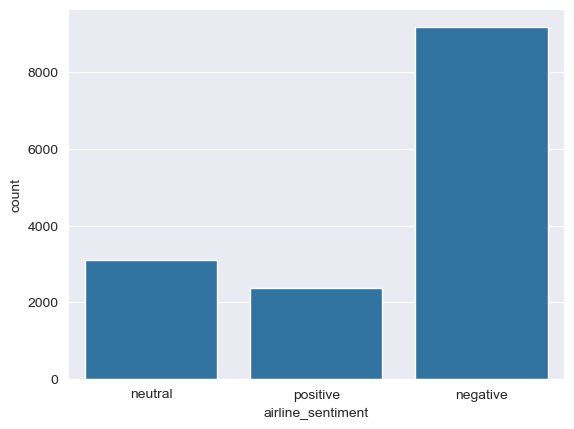

In [44]:
sns.countplot(data=df, x='airline_sentiment')

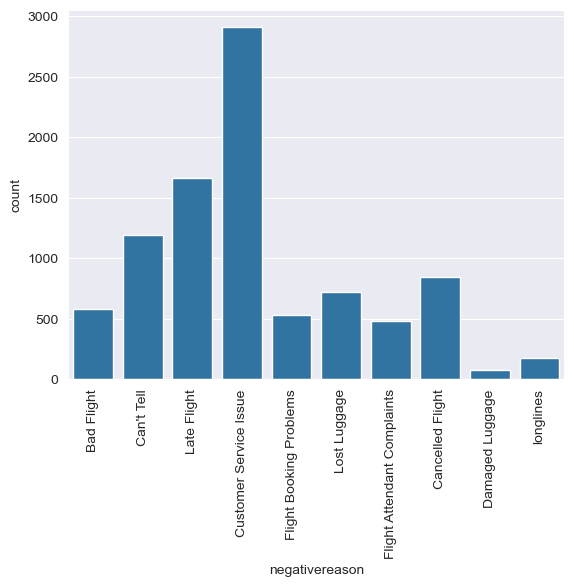

In [47]:
sns.countplot(data=df, x='negativereason')
plt.xticks(rotation=90);

<Axes: xlabel='airline', ylabel='count'>

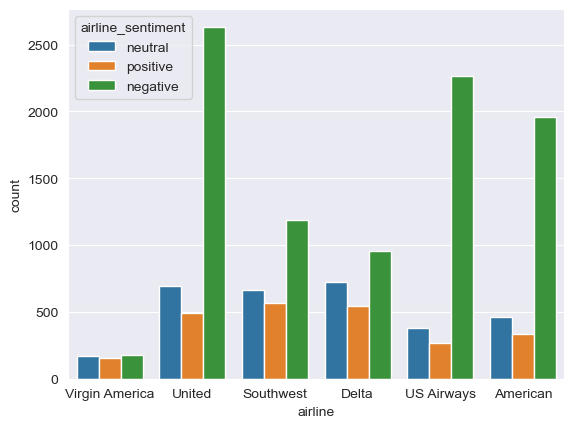

In [50]:
sns.countplot(data=df, x='airline', hue='airline_sentiment')

In [52]:
data = df[['airline_sentiment', 'text']]

In [53]:
data

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
...,...,...
14635,positive,@AmericanAir thank you we got on a different f...
14636,negative,@AmericanAir leaving over 20 minutes Late Flig...
14637,neutral,@AmericanAir Please bring American Airlines to...
14638,negative,"@AmericanAir you have my money, you change my ..."


In [54]:
X = data['text']

In [55]:
y = data['airline_sentiment']

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [60]:
tfidf = TfidfVectorizer(stop_words='english')

In [61]:
X_train_tfidf = tfidf.fit_transform(X_train)

In [62]:
X_test_tfidf = tfidf.transform(X_test)

# 191. Natural Language Processing - Classification of Text - Part Two